In [35]:
# Import pandas library for data manipulation and analysis
import pandas as pd
# Import matplotlib.pyplot for creating static visualizations
import matplotlib.pyplot as plt
# Import seaborn, a statistical data visualization library based on matplotlib
import seaborn as sns

In [36]:
# Load the personality dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('C:/Users/HUB/Desktop/extrovert_vs_introvert/data/personality_dataset.csv')

In [37]:
# Display the first 5 rows of the dataframe to get a quick overview of the data structure
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [38]:
# Display concise summary of the DataFrame including:
# - Total number of entries
# - Column names and their data types
# - Non-null counts for each column
# - Memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [39]:
# Count the occurrences of each unique value in the 'Personality' column
# and return a Series with the value counts in descending order
df['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

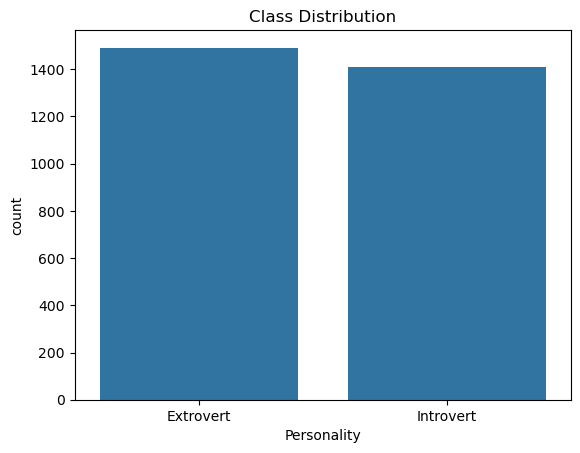

In [40]:
# Create a count plot to visualize the distribution of personality types in the dataset
sns.countplot(data=df, x='Personality')
# Add a title to the plot for clarity
plt.title('Class Distribution')
# Display the plot
plt.show()

In [41]:
# Get all column names with float data type from the dataframe
num_cols = df.select_dtypes(include='float').columns

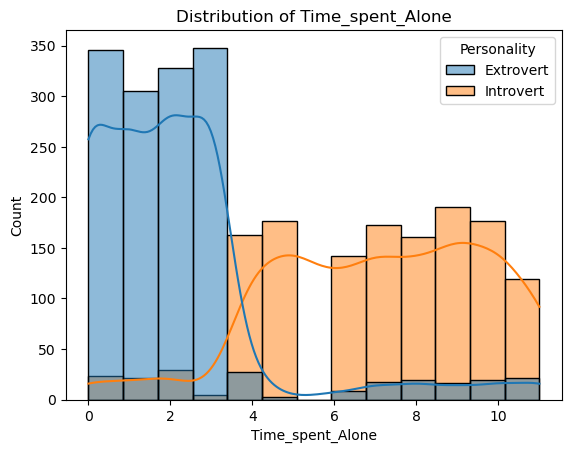

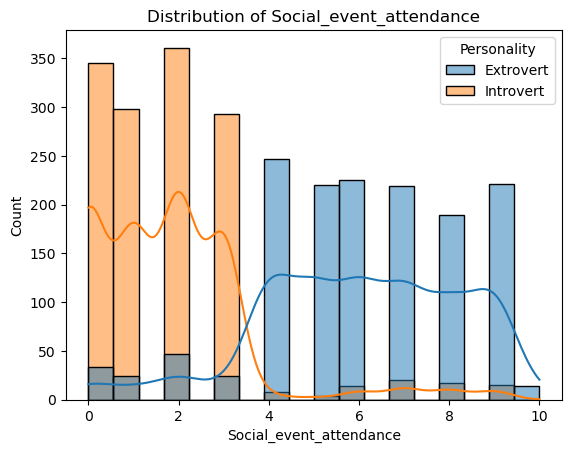

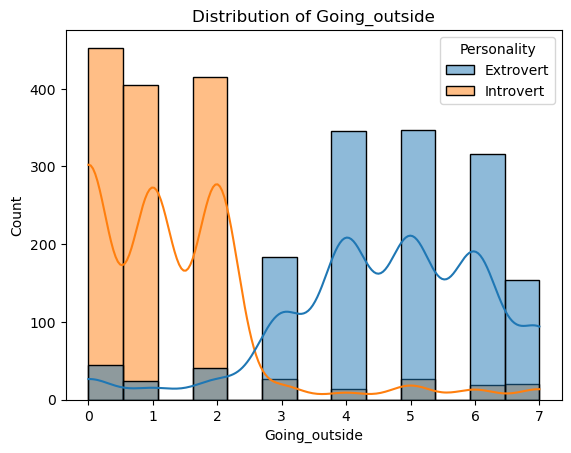

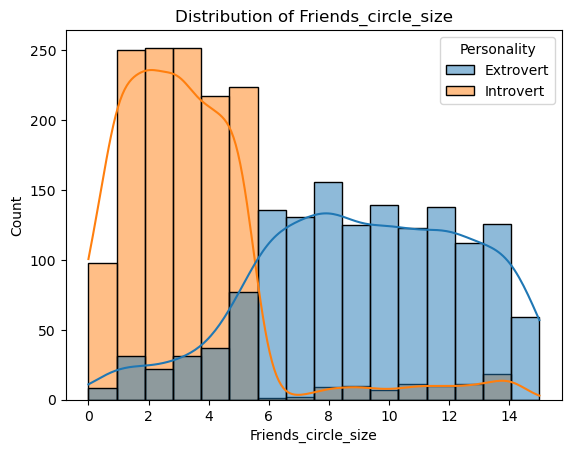

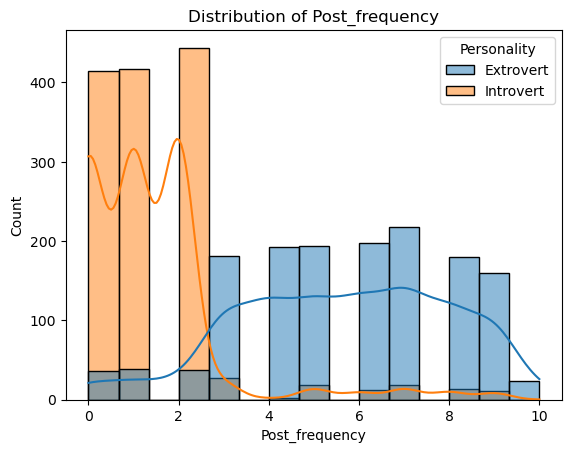

In [42]:
# Loop through each numerical column in the dataset
for col in num_cols:
    # Create a histogram with kernel density estimate for each column, colored by 'Personality'
    sns.histplot(data=df, x=col, kde=True, hue='Personality')
    # Add a title showing which column's distribution is being displayed
    plt.title(f'Distribution of {col}')
    # Display the plot and clear the figure for the next iteration
    plt.show()

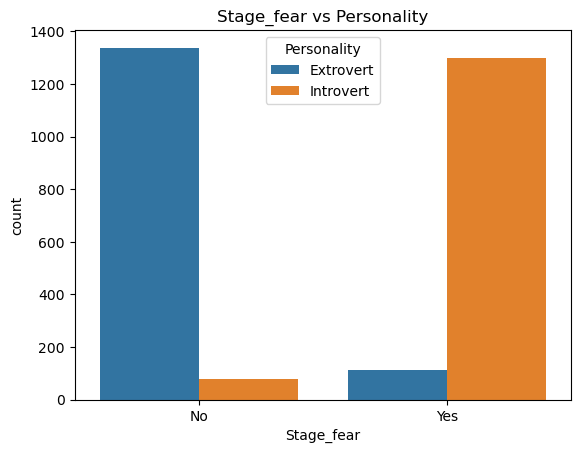

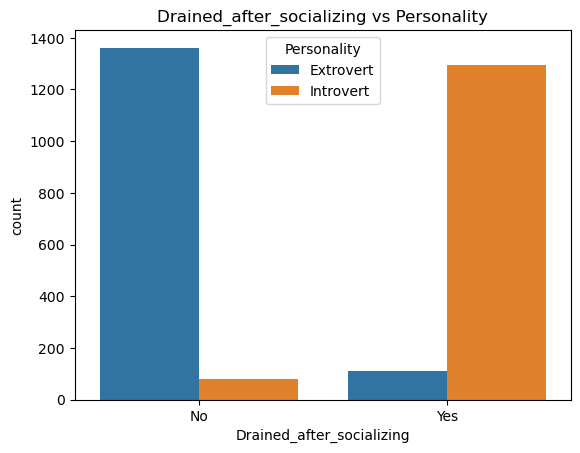

In [43]:
# Visualizing Categorical features

# Define a list of categorical columns to visualize
cat_col = ['Stage_fear', 'Drained_after_socializing']

# Loop through each categorical column
for col in cat_col:
    # Create a count plot showing the distribution of each category, colored by personality type
    sns.countplot(data=df, x=col, hue='Personality')
    # Add a title to the plot showing which feature is being visualized
    plt.title(f'{col} vs Personality')
    # Display the current plot before moving to the next one
    plt.show()

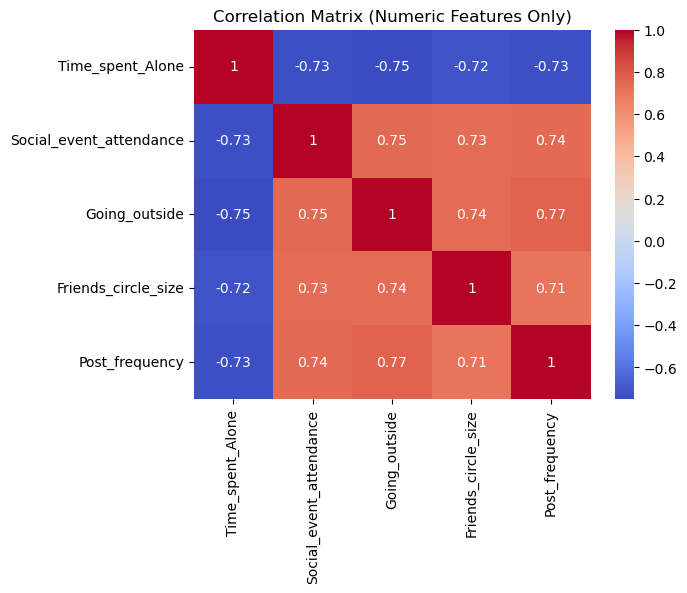

In [44]:
# Extract only numeric columns from the dataframe
df_numeric = df.select_dtypes(include='number')

# Create a correlation matrix heatmap with values displayed on each cell
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

# Add a title to the correlation matrix plot
plt.title('Correlation Matrix (Numeric Features Only)')

# Show the visualization
plt.show()

In [45]:
# Loop through each column in the numeric columns list
for col in num_cols:
    # Fill missing values (NaN) in each numeric column with the column's median value
    # The inplace=True parameter modifies the DataFrame directly instead of returning a copy
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\HUB\AppData\Local\Temp\ipykernel_15420\2762045013.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [46]:
# Loop through each categorical column in the list 'cat_col'
for col in cat_col:
    # Fill missing values (NaN) in each categorical column with the most frequent value (mode)
    # mode()[0] returns the first mode if there are multiple modes
    # inplace=True modifies the DataFrame directly without creating a copy
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\HUB\AppData\Local\Temp\ipykernel_15420\774743170.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [47]:
# Check the number of missing values in each column of the dataframe
# This returns a Series with column names as index and count of NaN values as values
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [48]:
# Create a mapping dictionary to convert categorical values to numeric
cat_map = {'Yes': 1, 'No': 0}
# Loop through each categorical column
for col in cat_col:
    # Convert the categorical values in the column to numeric using the mapping
    df[col] = df[col].map(cat_map)

In [49]:
# Convert categorical 'Personality' values to numeric
# Map 'Extrovert' to 1 and 'Introvert' to 0
personality_map = {'Extrovert': 1, 'Introvert': 0}
df['Personality'] = df['Personality'].map(personality_map)

In [50]:
# Export the DataFrame 'df' to a CSV file named 'df.csv' in the current directory
df.to_csv('df.csv')